<a href="https://colab.research.google.com/github/HalfMoon1008/yeardream/blob/main/sklearn_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Scikit-learn을 이용한 머신러닝 학습 가이드!

- scikit-learn(sklearn)을 완전히 사용해서 end-to-end로 학습시키는 코드를 완성해봅니다!

- 너무나 유명한 california house pricing 데이터를 이용하여 회귀분석 예제 코드를 만들어봅시다.


> Data Load - Data Preprocessing - Fit - Evalution - Predict

In [ ]:
!pip install sklearn

In [5]:
# Hands-on!!
from sklearn.datasets import fetch_california_housing

x = fetch_california_housing(as_frame = True).data # X
y = fetch_california_housing(as_frame = True).target # y
fetch_california_housing(as_frame = True).frame # X + y
print(x.shape, y.shape)

(20640, 8) (20640,)


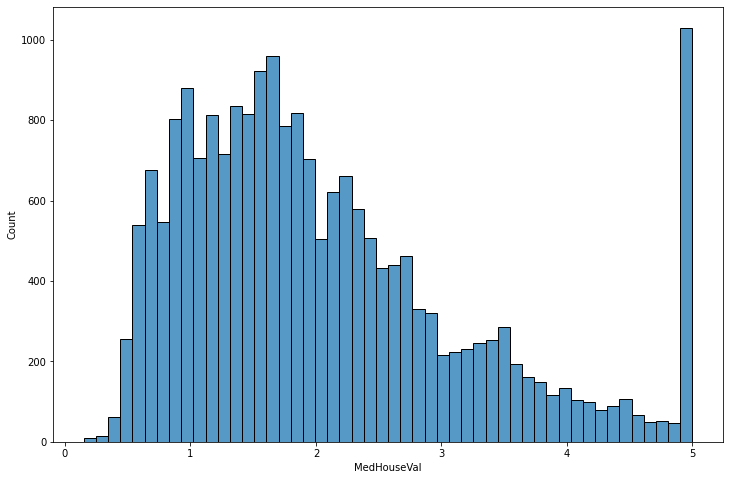

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 결측치 확인
# x.info()
x[x.isnull().any(axis=1)]

# 2. dtype이 object인 column이 있는지 확인 --> categorical feature를 확인하기 위해!


# 3. target distribution
plt.figure(figsize=(12,8))
sns.histplot(y, bins=50)
plt.show()

In [19]:
## Train-test Split

from sklearn.model_selection import train_test_split

# 트테트테
x_train, x_test, y_trian, y_test = train_test_split(x, y, test_size=0.2, random_state=0xC0FFEE) #20%를 테스트 케이스로 구성
print(x_train.shape, x_test.shape, y_trian.shape, y_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)


### Training(Fit)

In [35]:
# 1. 사용할 함수를 불러옵니다.
from sklearn.linear_model import LinearRegression
from lightgbm.sklearn import LGBMRegressor

# 2. 사용할 함수의 객체를 생성합니다.
reg = LinearRegression()
reg2 = LGBMRegressor()

# 3. 학습
reg.fit(x_train, y_trian) ## Regrassion : supervised learning  --> parameter update
reg2.fit(x_train, y_trian)

LGBMRegressor()

### Evaluation

In [37]:
# 학습 결과를 확인 (평가 지표)

from sklearn.metrics import mean_squared_error, r2_score

pred = reg.predict(x_train) # y_hat
pred2 = reg2.predict(x_train) # y_hat


print("---Linear Regression---")
print("MSE : %.4f" % mean_squared_error(y_trian, pred))
print("R2 : %.4f" % r2_score(y_trian, pred))
print("\n\n---LightGBM---")
print("MSE : %.4f" % mean_squared_error(y_trian, pred2))
print("R2 : %.4f" % r2_score(y_trian, pred2))

---Linear Regression---
MSE : 0.5309
R2 : 0.6018


---LightGBM---
MSE : 0.1570
R2 : 0.8822


### Prediction

In [38]:
result = reg.predict(x_test)
result2 = reg2.predict(x_test)
print("---Linear Regression---")
print("MSE : %.4f" % mean_squared_error(y_test, result))
print("R2 : %.4f" % r2_score(y_test, result))
print("\n\n---LightGBM---")
print("MSE : %.4f" % mean_squared_error(y_test, result2))
print("R2 : %.4f" % r2_score(y_test, result2))

## MSE는 0에 가까울수록 성능이 좋은 것
## R2는 1에 가까울수록 성능이 좋은 것

---Linear Regression---
MSE : 0.5005
R2 : 0.6224


---LightGBM---
MSE : 0.2106
R2 : 0.8411
